In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
dataA = pd.read_excel("cw5.xlsx", sheet_name = "Arkusz1")

In [47]:
radius = dataA['Srednica [mm]']/2 # mm
radius = radius/1000 # metry

freq = dataA['czestotliwosc [hz]']
N = dataA['N'] #ilosc zwojów

bkg_a = dataA['U_tla [uV]']
bkg_a = bkg_a*1e-6

Ux_max = dataA['Ux_max [uV]']
Ux_max = Ux_max*1e-6


B

In [48]:
dataB = pd.read_excel("cw5.xlsx", sheet_name = "Arkusz2")

In [49]:
no_rot = dataB['l obrotow']
U_bkg = dataB['U tła [uV]'][0] #uV
voltage = dataB['napiecie [mikro V]'] #uV
phase = dataB['faza']
voltage = [value - U_bkg for value in voltage]

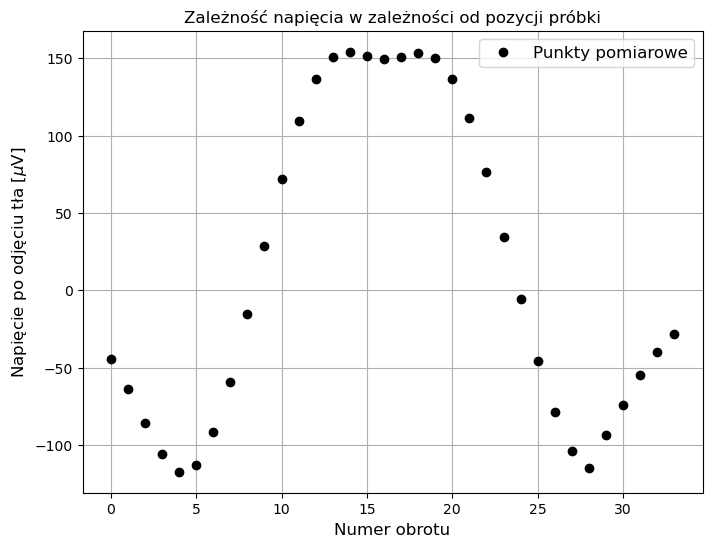

In [50]:
plt.figure(1, (8, 6))
plt.plot(no_rot, voltage, linestyle = '', marker = 'o', label = "Punkty pomiarowe", color = 'black')
plt.xlabel("Numer obrotu", fontsize = 12)
plt.ylabel(r"Napięcie po odjęciu tła [$\mu$V]", fontsize = 12)
plt.title("Zależność napięcia w zależności od pozycji próbki")
plt.grid()
plt.legend(fontsize = 12)
plt.savefig("wykres_obroty.jpg")

In [51]:
dataC = pd.read_excel("cw5.xlsx", sheet_name = "Arkusz3")
voltage = dataC['napiecie [mV]'] #mV
voltage_nano = dataC['napiecia nanoamp [uV]'] - 17.6
voltage = voltage + 0.87

In [52]:
def voltageToTemp(U):
    return 273.15 + 238.29 + 13.364*U - 4776.4/(U + 21.867) - 154.83/(U + 7.8242)

In [53]:
temperature = voltageToTemp(voltage)

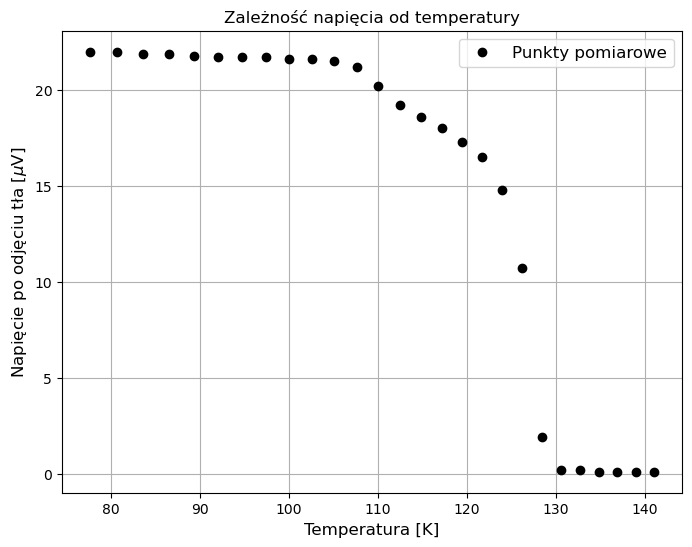

In [54]:
plt.figure(1, (8, 6))
plt.plot(temperature, voltage_nano, linestyle = '', marker = 'o', label = "Punkty pomiarowe", color = 'black')
plt.xlabel("Temperatura [K]", fontsize = 12)
plt.ylabel(r"Napięcie po odjęciu tła [$\mu$V]", fontsize = 12)
plt.title("Zależność napięcia od temperatury")
plt.grid()
plt.legend(fontsize = 12)
plt.savefig("wykres_napiecie_temperatura_gadolin.jpg")